In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)

In [2]:
df = pd.read_csv('NC0070605.1.counts.tsv', sep=' ', index_col=0)
df.head()

,donor1_day0,donor1_day1,donor1_day2,donor1_day3,donor1_day4,donor1_day5,donor1_day8,donor1_day14,donor2_day0,donor2_day1,...,donor2_day8,donor2_day14,donor3_day0,donor3_day1,donor3_day2,donor3_day3,donor3_day4,donor3_day5,donor3_day8,donor3_day14
A73,0.0,2.000,13.692,15.153,28.217,28.887,49.697,18.000,0.0,0.000,...,34.868,23.544,0.0,1.065,6.927,15.916,21.428,42.320,27.865,13.000
BALF1,0.0,4.000,0.000,2.000,2.000,0.000,9.000,2.000,0.0,0.000,...,0.000,1.000,0.0,3.000,0.000,0.000,6.000,6.000,2.000,3.000
BALF2,0.0,10.000,7.000,24.000,4.000,5.000,112.000,3.000,0.0,8.000,...,19.000,0.000,1.0,0.000,4.000,14.000,14.000,17.000,7.000,12.000
BALF3,3.0,0.000,75.993,151.938,140.094,275.597,380.035,105.907,4.0,32.745,...,135.654,128.404,2.0,49.000,48.581,87.547,141.428,277.724,101.049,142.204
BALF4,0.0,22.016,42.004,94.317,81.114,120.785,204.913,30.627,0.0,20.963,...,35.764,41.052,0.0,17.000,41.357,46.537,63.602,101.603,42.025,76.796


In [3]:
print(' -e '.join(df.sum(axis=1).sort_values(ascending=False).head(20).index))

BWRF1 -e EBNA-2 -e EBNA-LP -e EBNA-1 -e EBNA-3B/EBNA-3C -e BHRF1 -e EBNA-3A -e LMP-1 -e BZLF2 -e BPLF1 -e BALF3 -e BTRF1 -e BORF2 -e BcRF1 -e BXLF2 -e BLLF1 -e BALF5 -e LMP-2A -e BKRF4 -e BNRF1


In [4]:
print(' -e '.join(df.sum(axis=1).sort_values(ascending=False).head(10).index))

BWRF1 -e EBNA-2 -e EBNA-LP -e EBNA-1 -e EBNA-3B/EBNA-3C -e BHRF1 -e EBNA-3A -e LMP-1 -e BZLF2 -e BPLF1


In [5]:
print(' -e '.join(df.sum(axis=1).sort_values(ascending=False).head(5).index))

BWRF1 -e EBNA-2 -e EBNA-LP -e EBNA-1 -e EBNA-3B/EBNA-3C


## coverage

In [6]:
df_exon = pd.read_csv('exon.cov.txt', sep=' ', header=None)
df_exon.columns = ['exon']

df_nonexon = pd.read_csv('nonexon.cov.txt', sep=' ', header=None)
df_nonexon.columns = ['non exon']

df_genome = pd.read_csv('genome.cov.txt', sep=' ', header=None)
df_genome.columns = ['genome', 'sample']
df_genome['sample'] = df_genome['sample'].str.split('/').str.get(1).str.split('.').str.get(0)
df_genome['donor'] = df_genome['sample'].str.split('_').str.get(0)
df_genome['day'] = df_genome['sample'].str.split('_').str.get(1)

df_genome['exon'] = df_exon['exon']
df_genome['non exon'] = df_nonexon['non exon']
df_genome['exon coverage'] = df_genome['exon'] / df_genome['genome']
df_genome['non exon coverage'] = df_genome['non exon'] / df_genome['genome']

df_genome

,genome,sample,donor,day,exon,non exon,exon coverage,non exon coverage
0,1794,donor1_day0,donor1,day0,1208,965,0.673356,0.537904
1,177175,donor1_day1,donor1,day1,127808,87097,0.721366,0.491587
2,117548,donor1_day2,donor1,day2,80117,63878,0.681568,0.543421
3,69940,donor1_day3,donor1,day3,46474,39128,0.664484,0.559451
4,46368,donor1_day4,donor1,day4,31680,25354,0.683230,0.546800
5,49222,donor1_day5,donor1,day5,30875,29437,0.627260,0.598046
6,135020,donor1_day8,donor1,day8,85307,78839,0.631810,0.583906
7,43384,donor1_day14,donor1,day14,28516,25016,0.657293,0.576618
8,1282,donor2_day0,donor2,day0,900,671,0.702028,0.523401
9,122212,donor2_day1,donor2,day1,82556,68108,0.675515,0.557294


In [7]:
d1 = df_genome[['day', 'exon coverage']]
d1.columns = ['day', 'coverage']
d1['region'] = 'exon'

d2 = df_genome[['day', 'non exon coverage']]
d2.columns = ['day', 'coverage']
d2['region'] = 'non exon'

d = pd.concat([d1, d2])

/home/yyasumizu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/yyasumizu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(0.0, 1.0)

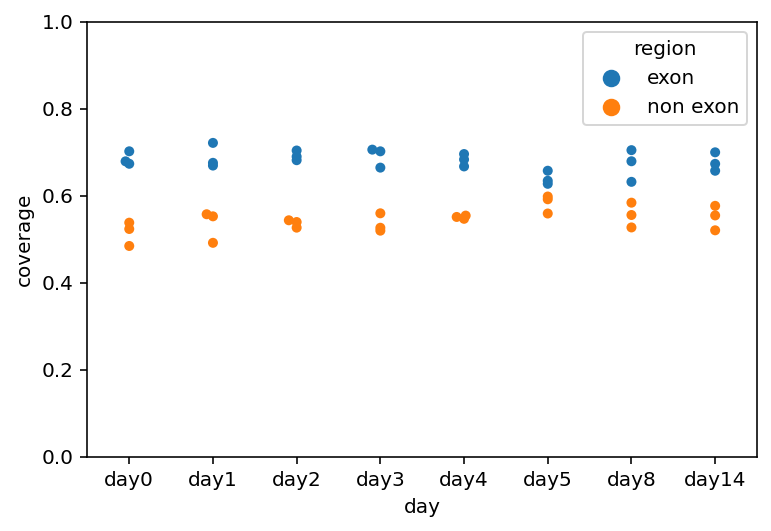

In [8]:
sns.swarmplot(data=d, y="coverage", x="day", hue="region")
plt.ylim(0,1)
# plt.savefig('coverage.pdf')

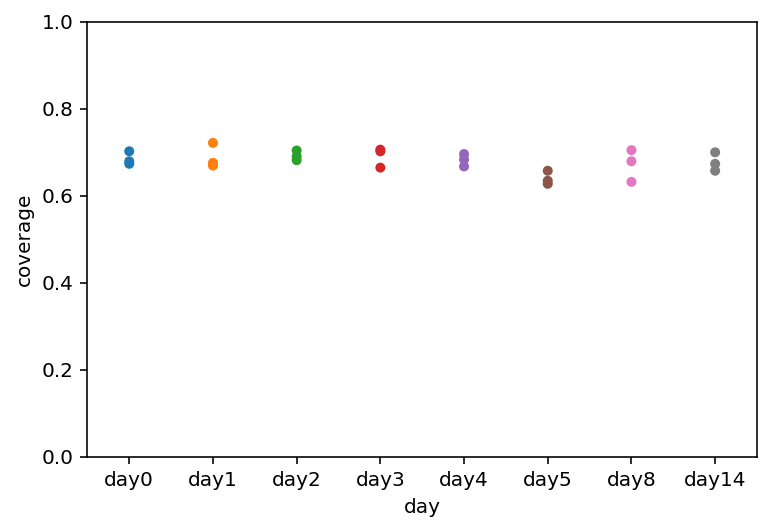

In [56]:
sns.swarmplot(data=df_genome, y="coverage", x="day")
plt.ylim(0,1)
plt.savefig('exon.coverage.pdf')

## Virtect

In [9]:
list_donors = ['1', '2', '3']
list_days = ['0', '1', '2', '3', '4', '5', '8', '14']
# list_days = ['0', '1', '2', '3', '4', '5', '8']

In [48]:
for donor in list_donors:
    for day in list_days:
        s = "donor{don}_day{day}".format(don=donor, day=day)
        d = pd.read_csv('Virtect_output/output/{}.txt'.format(s), delim_whitespace=True, skiprows=1, header=None)
        d.columns = [s, 'virus']
        d = d[d[s] > 400]
        
        if s == "donor1_day0":
            df_virtect = d.copy()
        else:
            df_virtect = pd.merge(df_virtect, d, how="outer")
df_virtect = df_virtect.fillna(0)

df_virtect.index = df_virtect.virus
# df_virtect = df_virtect.drop('virus')
df_virtect = df_virtect.drop(columns=['virus'])
df_virtect = df_virtect.sort_values(by='donor1_day1', ascending=False)
df_virtect.index = df_virtect.index.str.split(',').str.get(0)
df_virtect.head()

,donor1_day0,donor1_day1,donor1_day2,donor1_day3,donor1_day4,donor1_day5,donor1_day8,donor1_day14,donor2_day0,donor2_day1,...,donor2_day8,donor2_day14,donor3_day0,donor3_day1,donor3_day2,donor3_day3,donor3_day4,donor3_day5,donor3_day8,donor3_day14
virus,,,,,,,,,,,,,,,,,,,,,
NC_009823.1_Hepatitis_C_virus_genotype_2,5525018.0,6101557.0,5601056.0,6024024.0,5399320.0,4724923.0,6977921.0,4066142.0,5493226.0,5061926.0,...,5296012.0,5046568.0,4159842.0,4451776.0,5270636.0,5376633.0,6181823.0,4855603.0,4475547.0,4833411.0
NC_004102.1_Hepatitis_C_virus_genotype_1,1431200.0,1309365.0,1398834.0,1317367.0,1187331.0,1095186.0,1563943.0,1030610.0,955098.0,917825.0,...,920774.0,960034.0,881265.0,707698.0,1078436.0,1026097.0,1160606.0,1026481.0,807193.0,979065.0
NC_001672.1_Tick-borne_encephalitis_virus,863167.0,871020.0,786049.0,839841.0,796809.0,639413.0,1014744.0,631858.0,645084.0,651190.0,...,645213.0,635982.0,558309.0,493571.0,621895.0,671356.0,816680.0,631821.0,541049.0,615733.0
NC_009827.1_Hepatitis_C_virus_genotype_6,767062.0,813529.0,743886.0,750401.0,737025.0,595406.0,940187.0,614332.0,552712.0,559024.0,...,546278.0,573127.0,467579.0,436580.0,548623.0,570693.0,715873.0,529051.0,483084.0,550472.0
NC_015521.1_Cutthroat_trout_virus,414053.0,414937.0,365011.0,394820.0,370245.0,308332.0,475794.0,290930.0,304498.0,301663.0,...,310306.0,305285.0,267878.0,231961.0,289920.0,315637.0,375097.0,304892.0,245404.0,282630.0


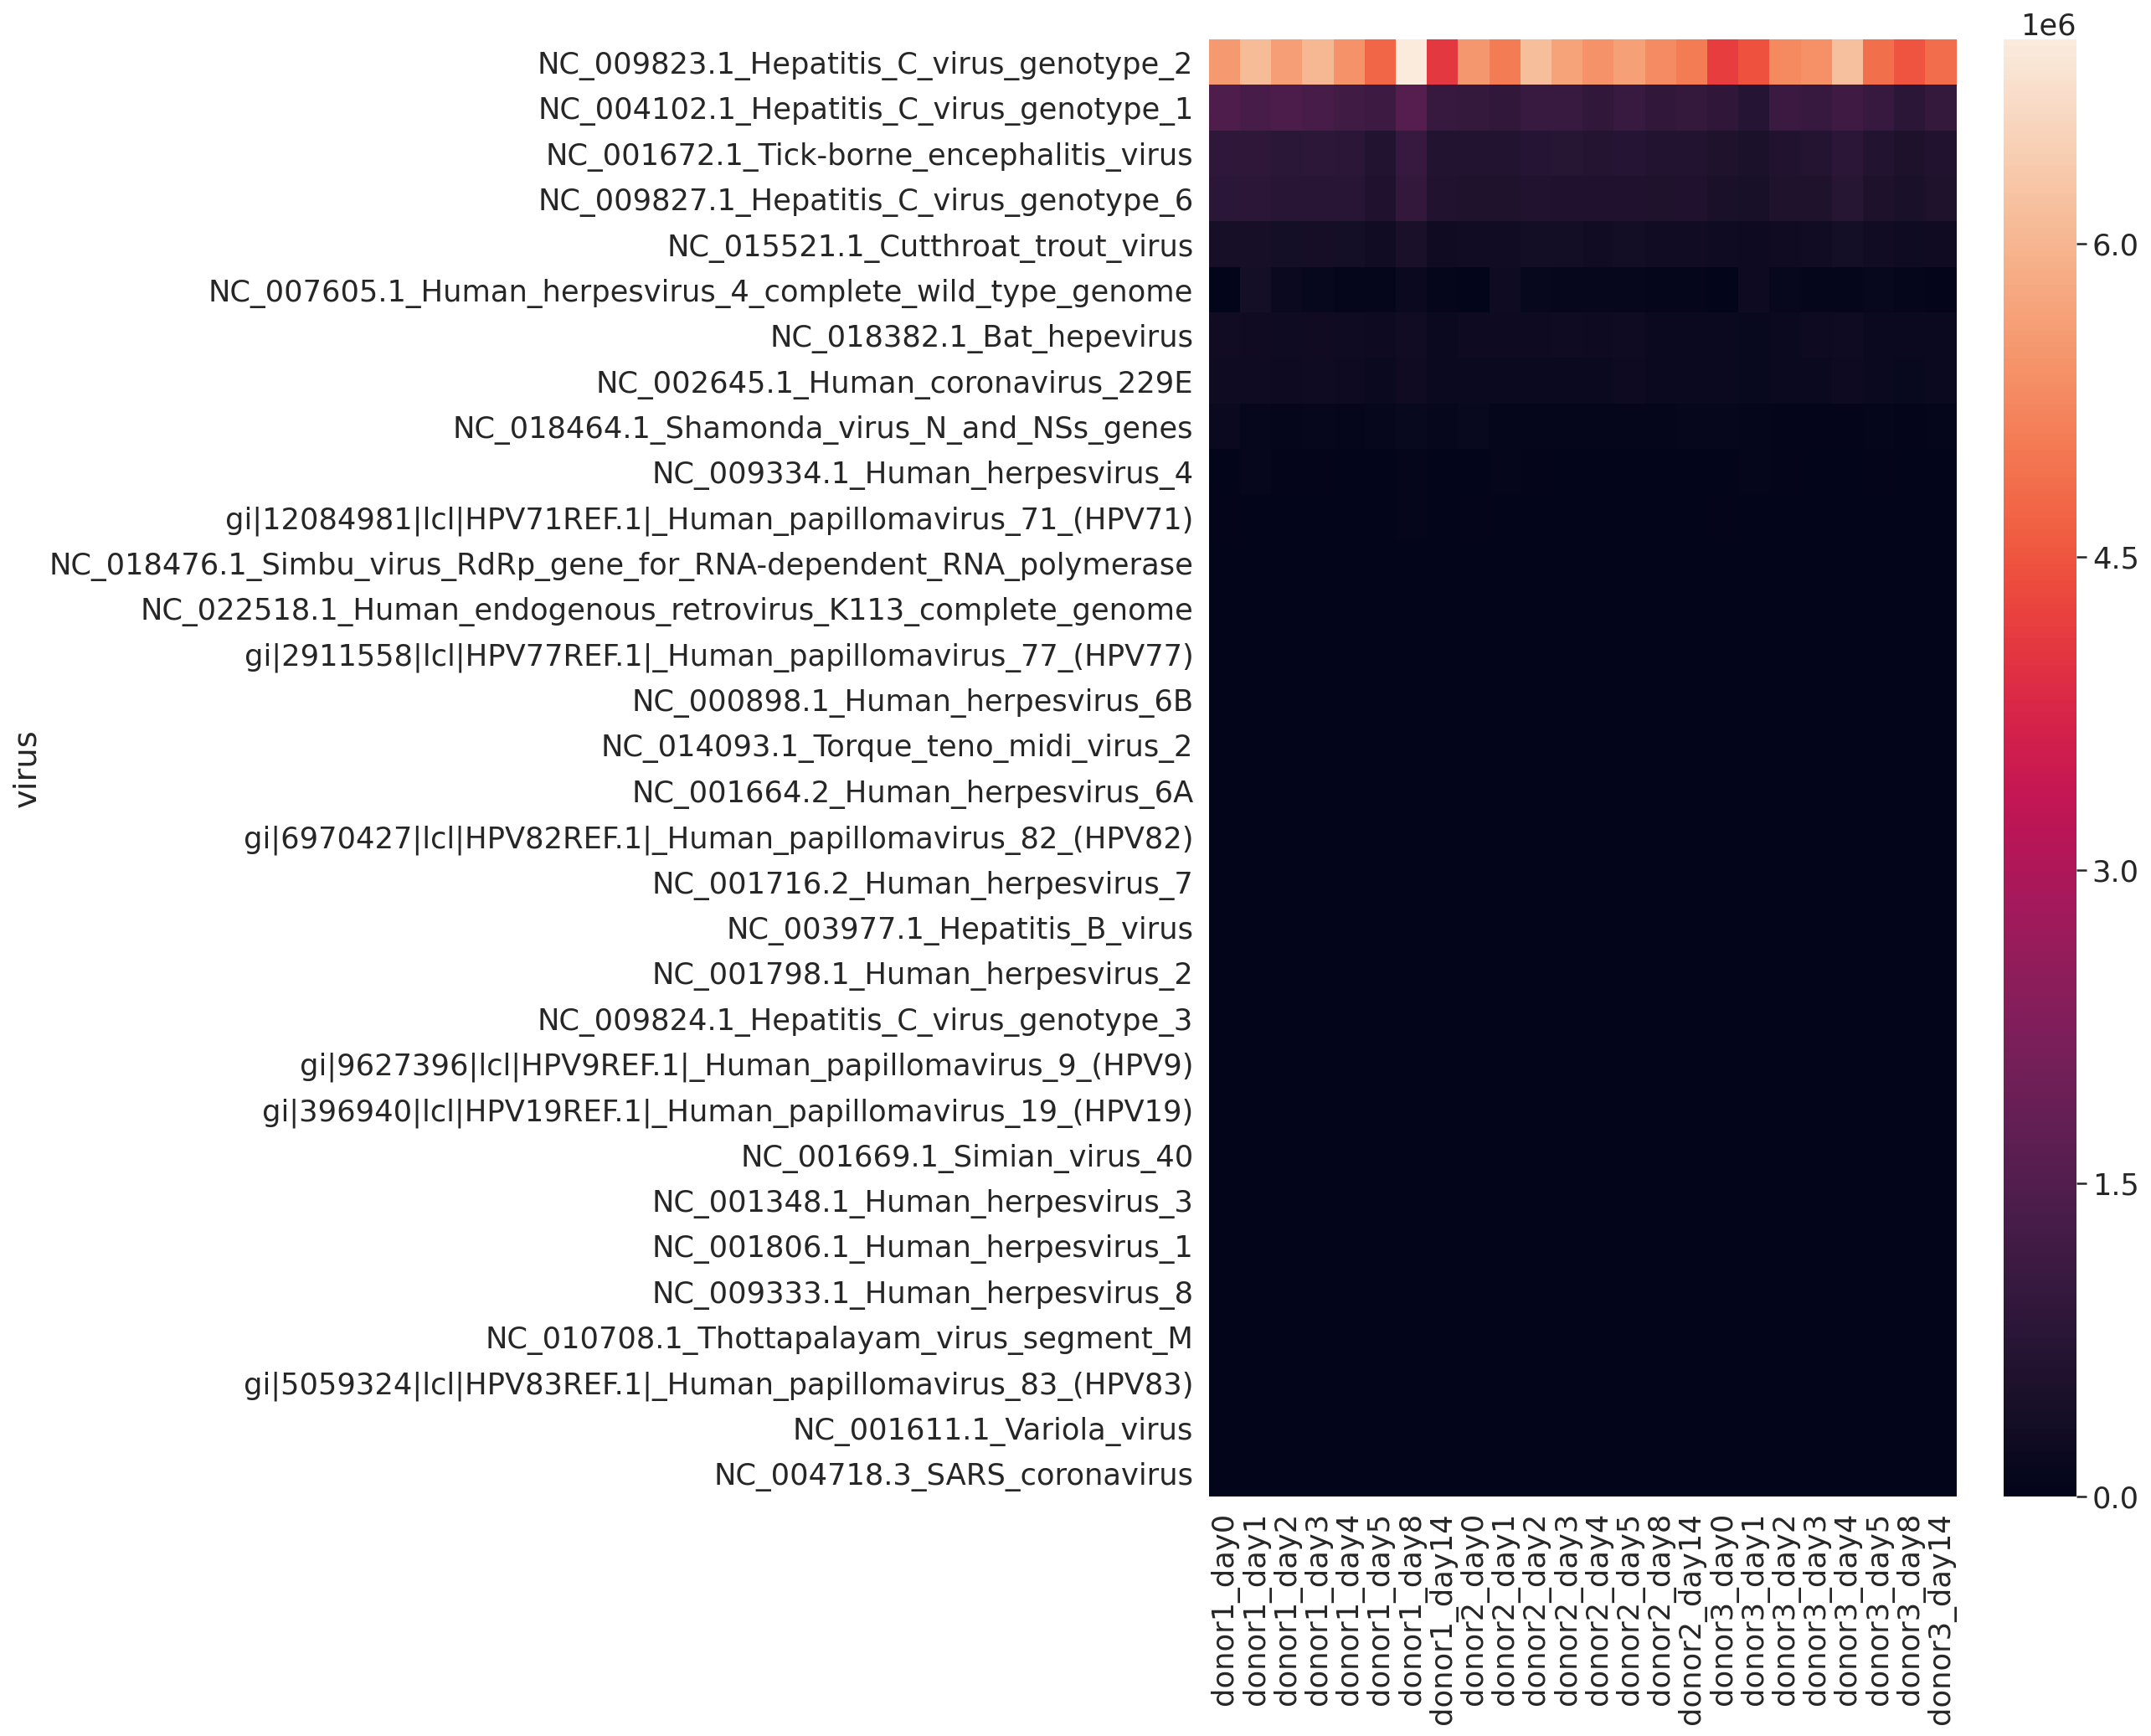

In [49]:
plt.figure(figsize=(10,16))
sns.set(font_scale=1.6)
sns.heatmap(df_virtect)
plt.savefig('img/vitect_heatmap.pdf', bbox_inches='tight')

## kraken2

In [14]:
list_donors = ['1', '2', '3']
# list_donors = ['1', '2']
list_days = ['0', '1', '2', '3', '4', '5', '8', '14']
# list_days = ['0', '1', '2']

In [15]:
for donor in list_donors:
    for day in list_days:
        s = "donor{don}_day{day}".format(don=donor, day=day)
        d = pd.read_csv('kraken2_output/report_{}'.format(s), sep='\t', header=None)
        d.columns = ['percent', '-', s, 'code', 'ID', 'virus']
        d = d.loc[d['code'] == 'S', ['virus', s]]
        d = d[d[s] > 400]
        
        if s == "donor1_day0":
            df_kraken2 = d.copy()
        else:
            df_kraken2 = pd.merge(df_kraken2, d, how="outer")
df_kraken2 = df_kraken2.fillna(0)

df_kraken2.index = df_kraken2.virus
# df_virtect = df_virtect.drop('virus')
df_kraken2 = df_kraken2.drop(columns=['virus'])
df_kraken2 = df_kraken2.sort_values(by='donor1_day1', ascending=False)
df_kraken2.head()

,donor1_day0,donor1_day1,donor1_day2,donor1_day3,donor1_day4,donor1_day5,donor1_day8,donor1_day14,donor2_day0,donor2_day1,...,donor2_day8,donor2_day14,donor3_day0,donor3_day1,donor3_day2,donor3_day3,donor3_day4,donor3_day5,donor3_day8,donor3_day14
virus,,,,,,,,,,,,,,,,,,,,,
Choristoneura fumiferana granulovirus,3966956.0,2914766.0,2190541.0,2665482.0,2710301.0,3144276.0,4769254.0,2813004.0,3964214.0,2945199.0,...,2953234.0,3148861.0,3268786.0,2251253.0,2014631.0,2205623.0,1933817.0,2628248.0,2124718.0,2354856.0
Shamonda orthobunyavirus,2201828.0,1456886.0,1191705.0,1502935.0,1511979.0,1578687.0,2325822.0,1428402.0,2298833.0,1323261.0,...,1546397.0,1655103.0,1810461.0,951967.0,863319.0,978978.0,1287953.0,1333288.0,1123751.0,1212083.0
Proteus phage VB_PmiS-Isfahan,1976508.0,992575.0,884873.0,1074003.0,1271446.0,1402527.0,2796466.0,1636306.0,1606832.0,1018019.0,...,1984102.0,1972801.0,1715823.0,1038473.0,1026906.0,1279017.0,1690754.0,1932792.0,1758198.0,1528250.0
BeAn 58058 virus,981210.0,757478.0,573996.0,495200.0,495254.0,478403.0,3015432.0,537995.0,773026.0,712229.0,...,606568.0,683136.0,791826.0,593557.0,620235.0,603236.0,623364.0,710349.0,654199.0,650738.0
Simbu orthobunyavirus,912430.0,512488.0,352971.0,454271.0,468141.0,496736.0,1088939.0,530742.0,1092670.0,534711.0,...,540859.0,531323.0,903876.0,627952.0,364442.0,395619.0,584836.0,354484.0,423768.0,298725.0


In [16]:
s

'donor3_day14'

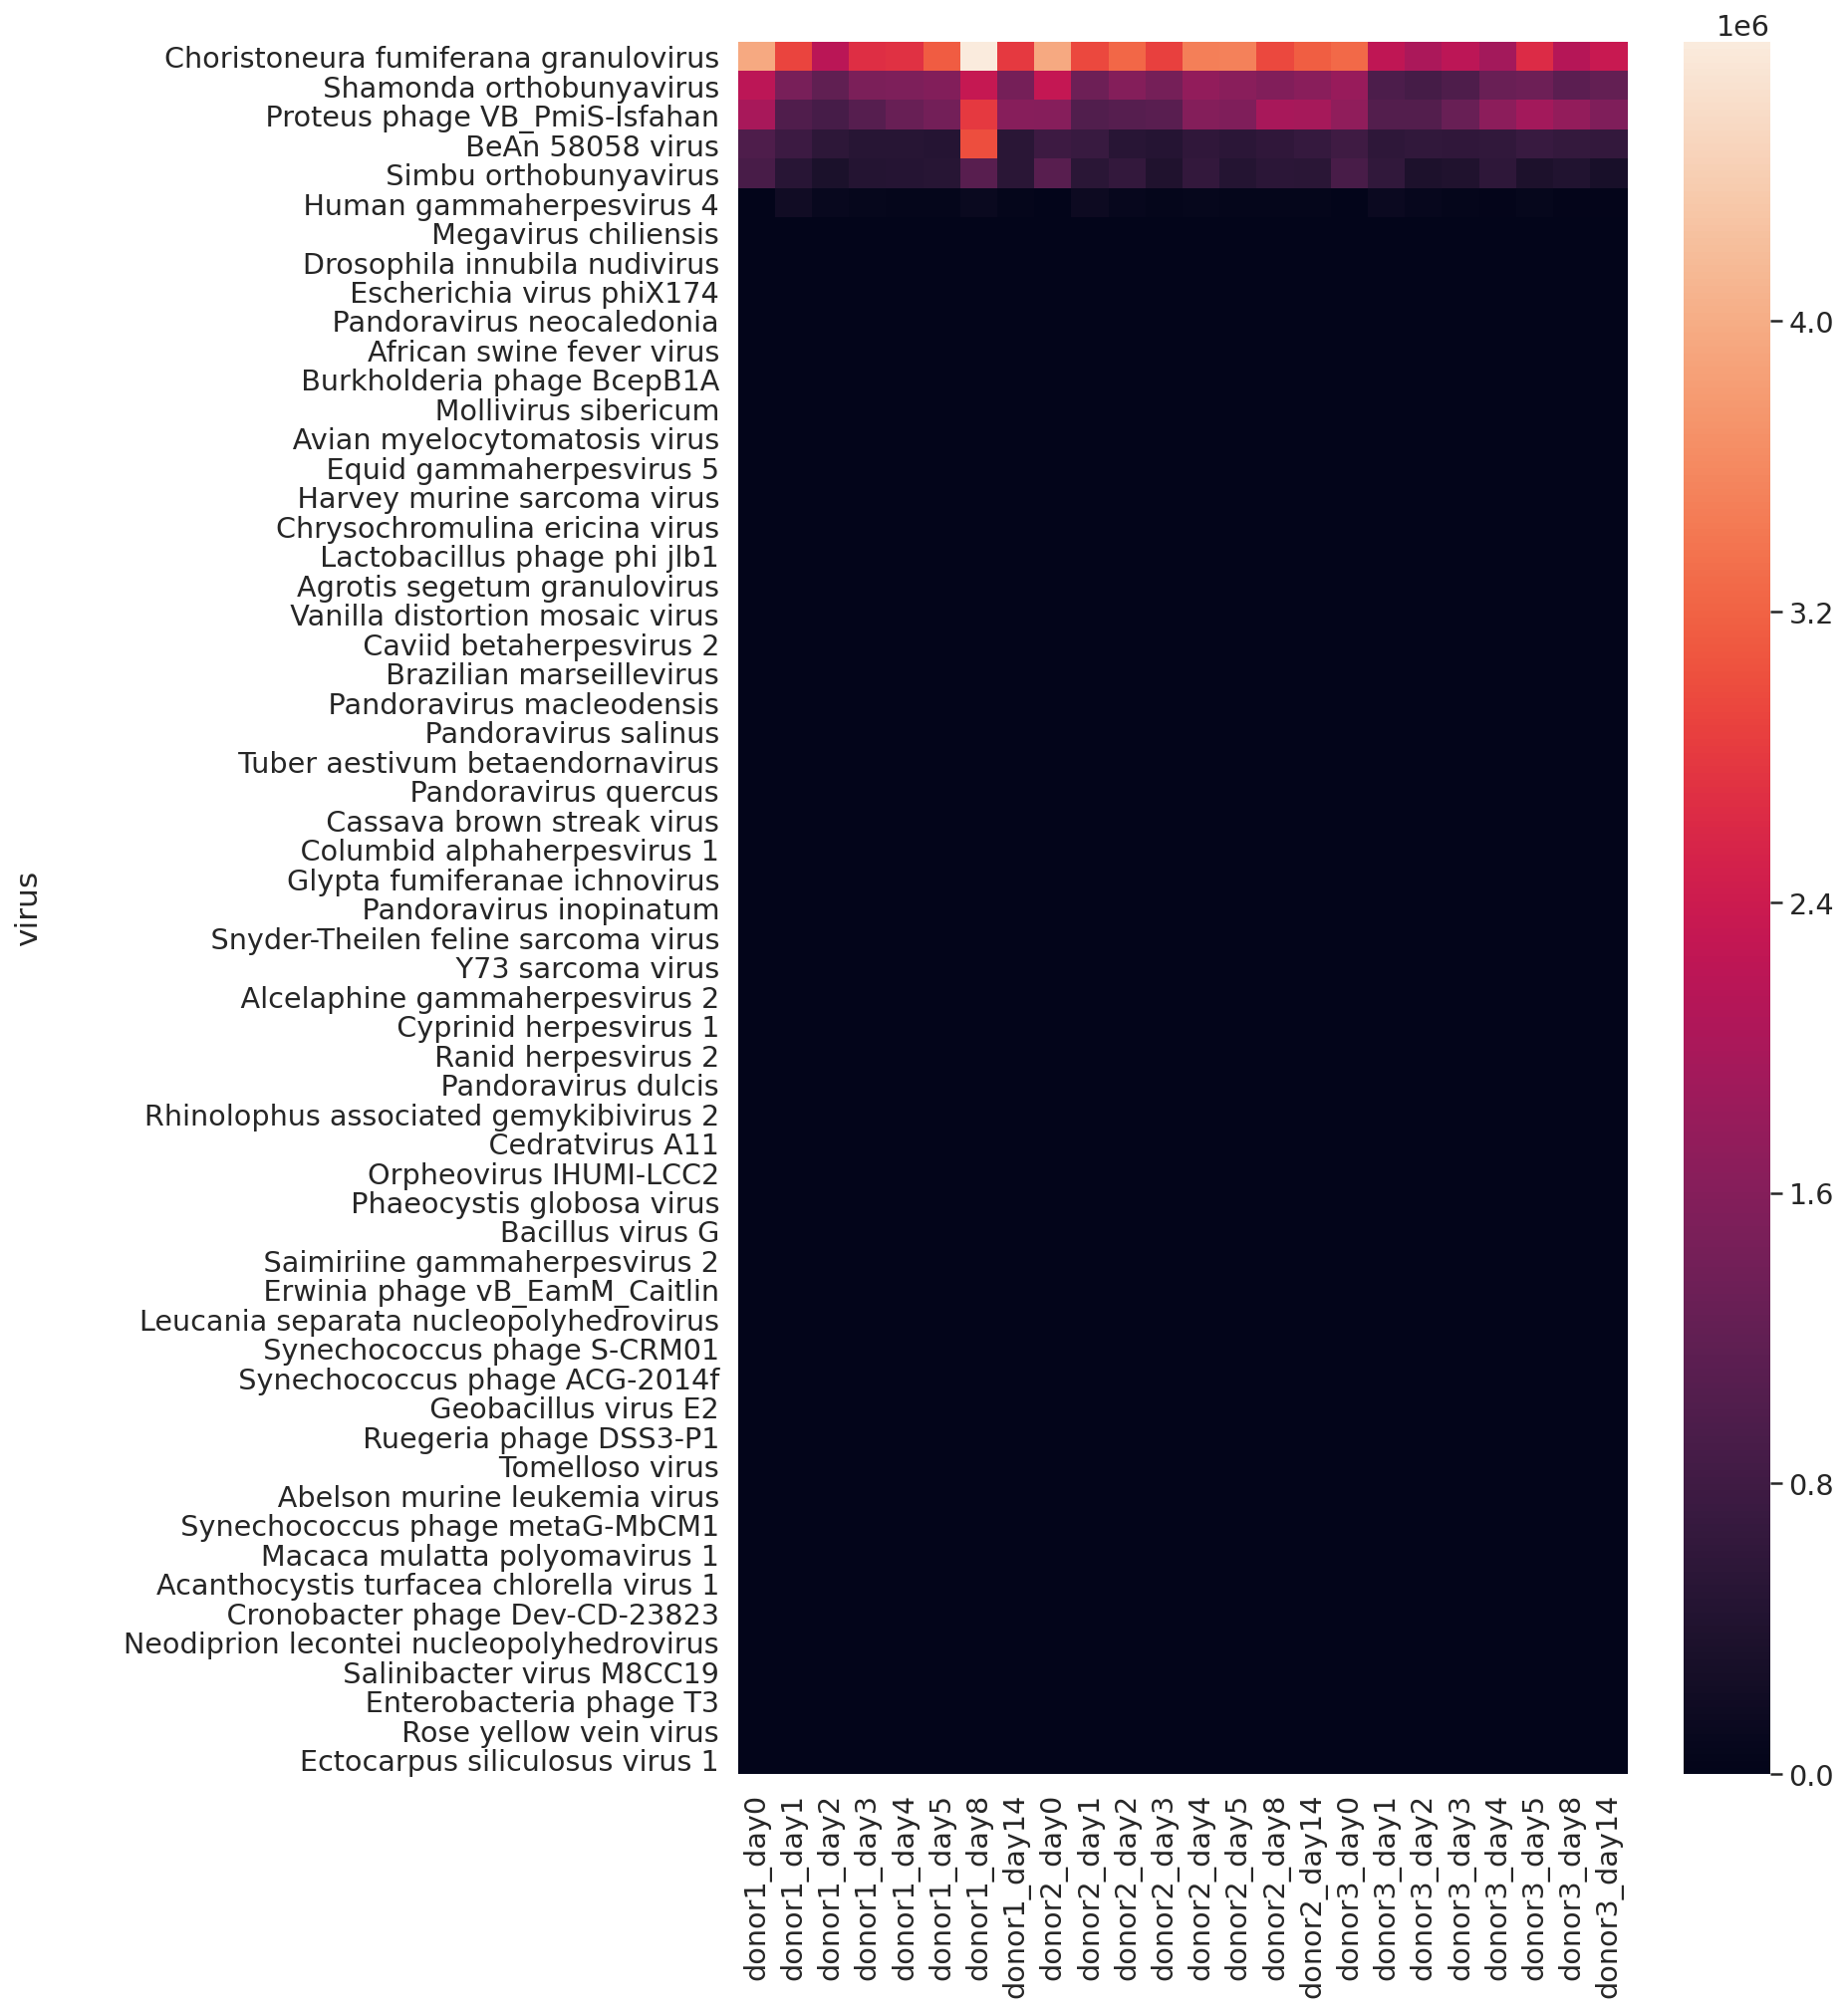

In [44]:
plt.figure(figsize=(10,16))
sns.set(font_scale=1.3) 
sns.heatmap(df_kraken2)
plt.savefig('img/kraken2_heatmap.pdf', bbox_inches='tight')